# Week 02: Intro to Python, Making some plots

### Topics
 1. Intro to Jupyter notebooks
 1. Making quick plots
 1. Read data from File
 
### Extras
 * Dot-plot/timeline
 * Diagrams
 * Starting to think about images

## 1. Intro to Jupyter notebooks

I can write things in here!

# This is a header!  Wow!

## This is a smaller header... it is less exciting.

I'm going to list some notes with bullet points:
 * this my first thing
 * this is my second thing
 
I'm going to make numbered notes:
  1. This will be number 1
  1. This will be number 2

Cells can be run plain-old python:

In [1]:
4+5

9

Or with Markdown:

5+6

This was an above insert.

This is markdown because I did `ESC-m`

This may not be important, but keep it in mind:

$ x = \frac{y}{5}$

This was an `ESC-b` for below cell

## 2. Making quick plots

### Getting started with python
* First, lets get started by making sure we are using matplotlib in "inline" mode
* The "%" here means this is a "magic function" in iPython, where jupyter is sort of built on iPython, and iPython is the "interactive" form of python.  Here a "magic function" is sort of like a command line call, i.e. a call in python that does not rely on using python syntax
* All that the "inline" is saying is please present the images generated with matplotlib in the actual notebook, don't try to save them somwhere else

**UPDATE:** I think you no longer have to do this in newer versions of jupyter notebook:

In [2]:
%matplotlib inline


### Import matplotlib stuffs
* ok, so now we are doing the actual importing of libraries
* matplotlib is sort of a generic plotting library
* matplotlib.pyplot is a list of plotting routines, and you'll often see it short-handed as plt
* And here we are just setting the kind of font we want to use

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import datetime

# if you want to mess with parameters for *all* plots in this notebook
#matplotlib.rcParams["font.family"] = "Questrial" # note, could also use like "sans-serif" others, just google
#matplotlib.rcParams["font.family"] = "sans-serif" # note, could also use like "sans-serif" others, just google

### Import numpy
* now, lets import numpy, usually shorthanded as "np"
* this is a set of tools that allows for array manipulation - remember that Python natively does things as lists, and numpy allows for mathematical operations with arrays, like multiplying and adding arrays for example

In [3]:
import numpy as np

### Getting on with it!
* now, lets generate some data to make some plots with
* lets check out that FRED data we were looking at before

| Date | GDP in Billions of $ |
| ---- | -- |
| 2007-01-01 | 14233.2 |
| 2007-04-01 | 14422.3 |
| 2007-07-01 | 14569.7 |
| 2007-10-01 | 14685.3 |
| 2008-01-01 | 14668.4 |
| 2008-04-01 | 14813.0 |
| 2008-07-01 | 14843.0 |
| 2008-10-01 | 14549.9 |
| 2009-01-01 | 14383.9 |


Let's put our time delimiter in units of YEAR MONTH DAY, which will naturally sort our data.

*NOTE: for the online class, this can be copied and pasted into chat window, for in-person class, can be copied and pasted into the Slack*

Text(0, 0.5, 'YearMonthDay')

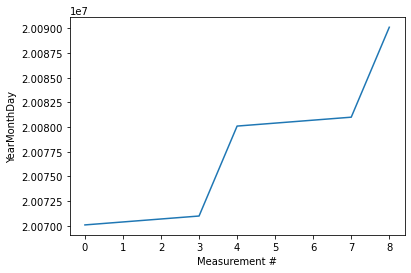

In [4]:
time = [20070101, 20070401, 20070701, 20071001, 20080101, 20080401, 20080701, 20081001, 20090101]
# we can plot this to see this sorting
plt.plot(time)
# Let's also put on some labels
plt.xlabel('Measurement #')
plt.ylabel('YearMonthDay')
# so, we can see here that time is monotonically increasing

Let's also plot the array of GDPs (gross domestic products):

Text(0, 0.5, 'GDP in Billions')

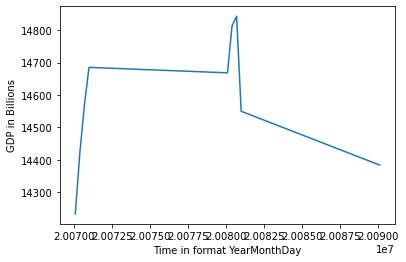

In [5]:
# now, lets also put in the array of GDPs
gdp = [14233.2, 14422.3, 14569.7, 14685.3, 14668.4, 14813.0, 14843.0, 14549.9, 14383.9]
# now, we can do the most basic-est of plots
plt.plot(time, gdp)
plt.xlabel('Time in format YearMonthDay')
plt.ylabel('GDP in Billions')

It might be a little hard here to see where the actual measurements are, so lets change things with a marker:

Text(0, 0.5, 'GDP in Billions')

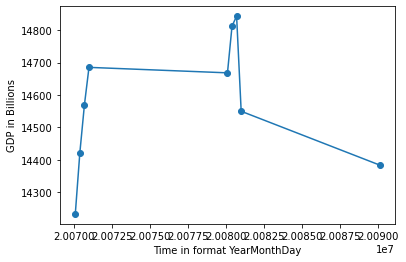

In [6]:
plt.plot(time, gdp, 'o-')
plt.xlabel('Time in format YearMonthDay')
plt.ylabel('GDP in Billions')
# cool, much better!

### Using Datetime for dates
* only issue with the above is that it is hard to figure out what dates are what
* we can use the datetime package to format our axis all nice like

In [7]:
from datetime import datetime

Now we'll make a `date` list object and use the `datetime` library to format things for us:

In [8]:
date = []
# lets loop through and update our time array
for t in time:
    date.append( datetime.strptime(str(t), '%Y%m%d') )

Let's take a look at what our list of datetime objects looks like:

In [9]:
print(date)

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 4, 1, 0, 0), datetime.datetime(2007, 7, 1, 0, 0), datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 1, 1, 0, 0), datetime.datetime(2008, 4, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0), datetime.datetime(2008, 10, 1, 0, 0), datetime.datetime(2009, 1, 1, 0, 0)]


Now let's replot using our list of `datetime` objects on the x-axis:

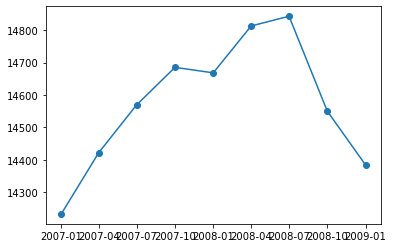

In [10]:
plt.plot(date,gdp,'o-')

We get some dates now on the x-axis, and they are evenly spaced which makes sense since the measurements are at the first of each month, but they are still a bit hard to read.

### Lets think of a different way to visualize this same dataset (we will probably skip this in class)
* Suppose instead, we want to highlight regions of "low" and "high" GDP
* so, first we have to define what low and high mean

For the sake of plotting, lets split up our data into dates of "high" GDP and dates of "low" GDP and those that are just "average" or in the middle. First, lets turn our lists into arrays so that we can do this more easily using the `numpy` package:

In [11]:
gdp = np.array(gdp)
date = np.array(date)

Let's just arbitarily choose a split between low and high GDP:

In [12]:
#  this is a rather arbitrary split:
gdp_high = 14600.0

Now, lets grab the time min & max for when this occurs.  We can use array manipulations to do this by using boolean expressions.  For example we can create arrays of when things are true or false:

In [13]:
gdp >= gdp_high

array([False, False, False,  True,  True,  True,  True, False, False])

And using this boolean expression,we can select GDP:

In [14]:
gdp[gdp >= gdp_high]

array([14685.3, 14668.4, 14813. , 14843. ])

... and the dates that correspond to this "high" GDP:

In [15]:
date[gdp >= gdp_high]

array([datetime.datetime(2007, 10, 1, 0, 0),
       datetime.datetime(2008, 1, 1, 0, 0),
       datetime.datetime(2008, 4, 1, 0, 0),
       datetime.datetime(2008, 7, 1, 0, 0)], dtype=object)

We can also construct a time interval that encompasses the dates where the GDP is high:

In [16]:
time_high = [(date[gdp >= gdp_high]).min(), (date[gdp >= gdp_high]).max()]
time_high

[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]

We can do the same thing for an arbitrary cut of "low" GDP values:

In [17]:
# and same for low
gdp_low = 14300.0
time_low = [(date[gdp <= gdp_low]).min(), (date[gdp <= gdp_low]).max()]
time_low

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]

We can even try to do a comparison by printing both out:

In [18]:
# lets take a quick look at them
print(time_high)
print(time_low)

[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]
[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]


Alright, we are in fact summarizing something interesting about our data, but how easy is it to understand when periods of high/low GDP in our dataset happened?

We can do better... with a visualization!

## 3. Reading in data from a file
Note, we can also do plots like the above by reading in data from a file
* Let's read in the same GDP data
* go to: https://fred.stlouisfed.org/series/GDP to download the data *or* you can download from the course page for week 01
* if downloading directly from FRED: click on the "Download" and select CSV

### The Hard way (we will probably skip this in class or go over it quickly)
There are several ways to read in CSV files that we will use throughout the course but right now.  We'll usually end up using the `Pandas` package (in the install list) to do this, but first, we'll do this the hard way by making ourselves a little converter like so:

In [19]:
def converter(v):
    #print(v, v.decode("ascii"))
    return datetime.strptime(v.decode("ascii"), '%Y-%m-%d')

Where is my file located?  One way to do this is open a terminal to look, or use a file browser.  But it is likely wherever downloads usually get stored on your local machine!

**Note:** if you are on a windows, you will have a different filepath: Can someone with a windows machine post in the Slack chat what their filepath looks like so folks can see it?

In [20]:
myFredFile = "/Users/jillnaiman/Downloads/GDP.csv"

We're going to use loadtxt to load this file from `numpy`, but we want give each column a name & data type:

In [21]:
myFredType = np.dtype([("date", datetime), ("gdp", np.float64)])

Now all that is left to do is read in the thing!

In [22]:
with open(myFredFile, "r") as f:
    data = np.loadtxt(f, skiprows=1, delimiter=",", converters={0: converter}, dtype=myFredType)
    # Note: this {0: converter} bit just means we are only using the one converter for our data

data

array([(datetime.datetime(1947, 1, 1, 0, 0),   243.164),
       (datetime.datetime(1947, 4, 1, 0, 0),   245.968),
       (datetime.datetime(1947, 7, 1, 0, 0),   249.585),
       (datetime.datetime(1947, 10, 1, 0, 0),   259.745),
       (datetime.datetime(1948, 1, 1, 0, 0),   265.742),
       (datetime.datetime(1948, 4, 1, 0, 0),   272.567),
       (datetime.datetime(1948, 7, 1, 0, 0),   279.196),
       (datetime.datetime(1948, 10, 1, 0, 0),   280.366),
       (datetime.datetime(1949, 1, 1, 0, 0),   275.034),
       (datetime.datetime(1949, 4, 1, 0, 0),   271.351),
       (datetime.datetime(1949, 7, 1, 0, 0),   272.889),
       (datetime.datetime(1949, 10, 1, 0, 0),   270.627),
       (datetime.datetime(1950, 1, 1, 0, 0),   280.828),
       (datetime.datetime(1950, 4, 1, 0, 0),   290.383),
       (datetime.datetime(1950, 7, 1, 0, 0),   308.153),
       (datetime.datetime(1950, 10, 1, 0, 0),   319.945),
       (datetime.datetime(1951, 1, 1, 0, 0),   336.   ),
       (datetime.datetime(1

Let's re-do this plot with the whole dataset:

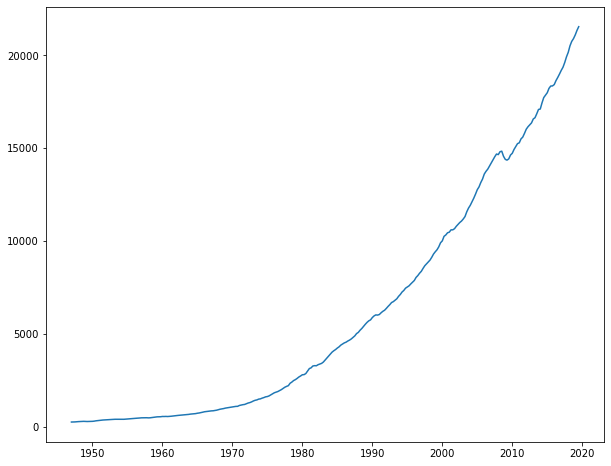

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot_date(data["date"], data["gdp"], '-')

plt.show()

Let's make our plot a little fancier by specifying a certain "style" for our plot, in this case, we will have it look like a plot from fivethirtyeight.com.  Here will use a `with` statement to make sure that *only this plot* is in this style:

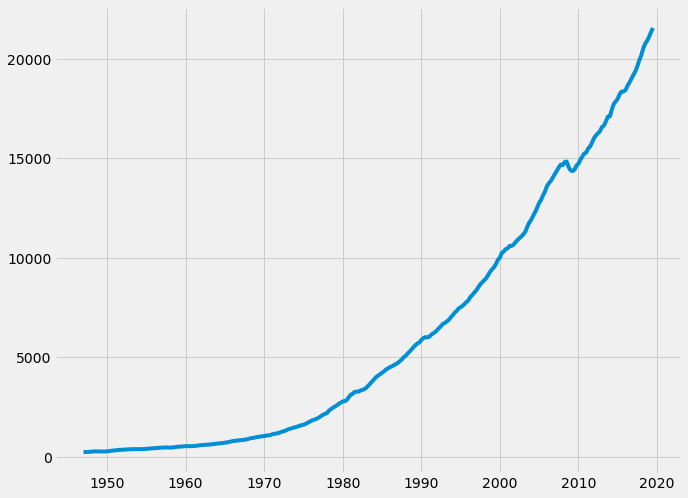

In [25]:
style = 'fivethirtyeight'
with plt.style.context(style): 
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot_date(data["date"], data["gdp"], '-')
    plt.show()

Note if we replot, because we used a `with` statement, we will revert back to the default plotting style:

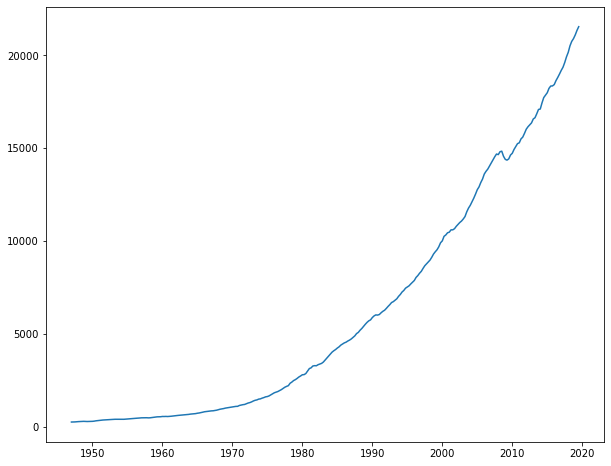

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot_date(data["date"], data["gdp"], '-')

plt.show()

As will become a habit with us, we're going to make what we just did into a specialized custom plotting function so we can try out a bunch of styles:

In [26]:
# now lets again make a cool plotting routine
def make_gdp_plot(style): # note, "style" is something you can gooogle if you want more options
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_title("Style: %s" % style)
        ax.plot_date(data["date"], data["gdp"], '-')
        plt.show()

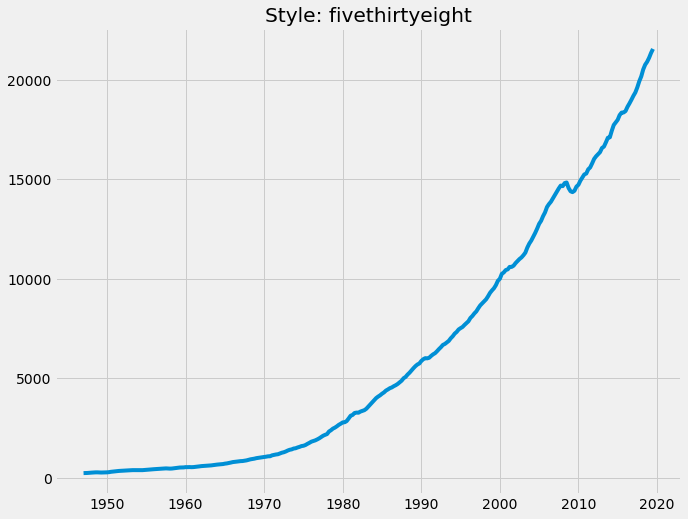

In [27]:
make_gdp_plot('fivethirtyeight')

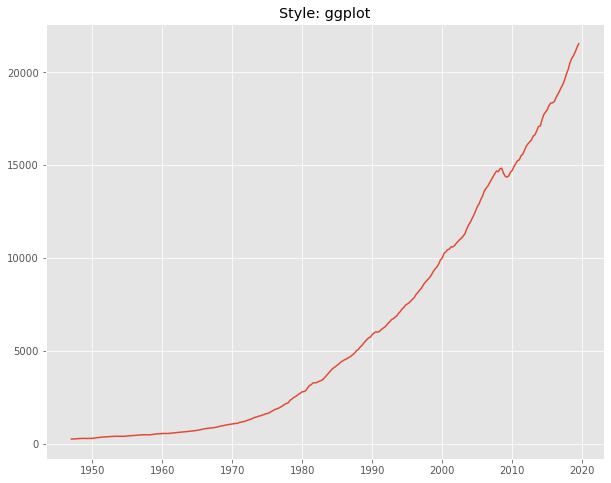

In [28]:
make_gdp_plot('ggplot')

Finally, like before, we can also just look at the values by eye:

In [29]:
for v in data["date"][240:260]: print(v)
# note that the zeros in the 2nd column are just the assumption that the data was taken at midnight

2007-01-01 00:00:00
2007-04-01 00:00:00
2007-07-01 00:00:00
2007-10-01 00:00:00
2008-01-01 00:00:00
2008-04-01 00:00:00
2008-07-01 00:00:00
2008-10-01 00:00:00
2009-01-01 00:00:00
2009-04-01 00:00:00
2009-07-01 00:00:00
2009-10-01 00:00:00
2010-01-01 00:00:00
2010-04-01 00:00:00
2010-07-01 00:00:00
2010-10-01 00:00:00
2011-01-01 00:00:00
2011-04-01 00:00:00
2011-07-01 00:00:00
2011-10-01 00:00:00


In [30]:
# and here is how things look for the gdp
for v in data["gdp"][240:260]: print(v)

14208.569
14382.363
14535.003
14681.501
14651.039
14805.611
14835.187
14559.543
14394.547
14352.85
14420.312
14628.021
14721.35
14926.098
15079.917
15240.843
15285.828
15496.189
15591.85
15796.46


## EXTRA: Let's now visualize this on a timeline instead of a graph
* we will highlight regions of low and high there
* this will make use of a lot of the customization options available to you in `matplotlib`

Let's start by making a timeline that shows all the measurements and also the range of low & high GDPs.

We'll use the `matplotlib` interface in a slightly different way: by using "axes objects":

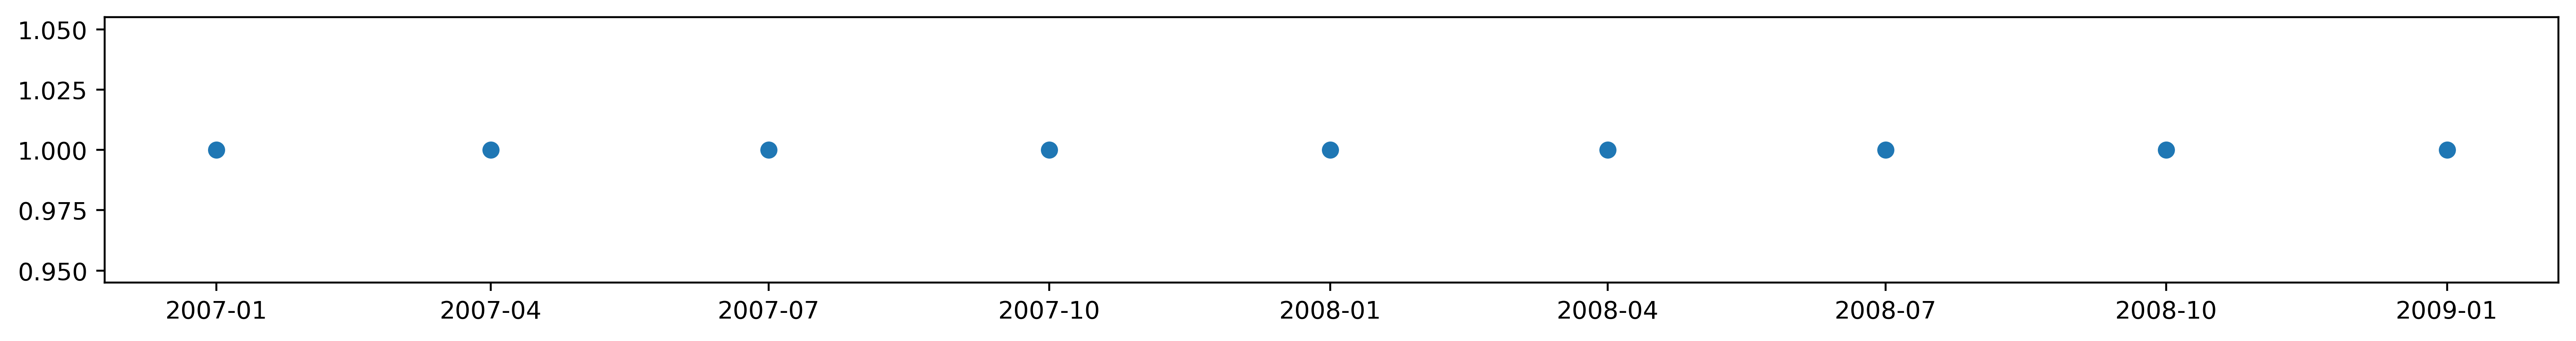

In [31]:
# here we can specify things like # of axis in columns/rows and the figure size
fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots

# First, lets just make an empty plot
ax.plot(date, [1]*len(date), marker='o', lw=0)
# note: the [1]*len(time) here just plots everything on our timeline at a y-value of 1 (see below)
# lw=0 means no line

plt.show()

In [32]:
[1]*5

[1, 1, 1, 1, 1]

Let's build up this figure's appearence bit by bit and using a lot of the options of the `matplotlib` axes object interface.

First, let's take of the y-axis labels:

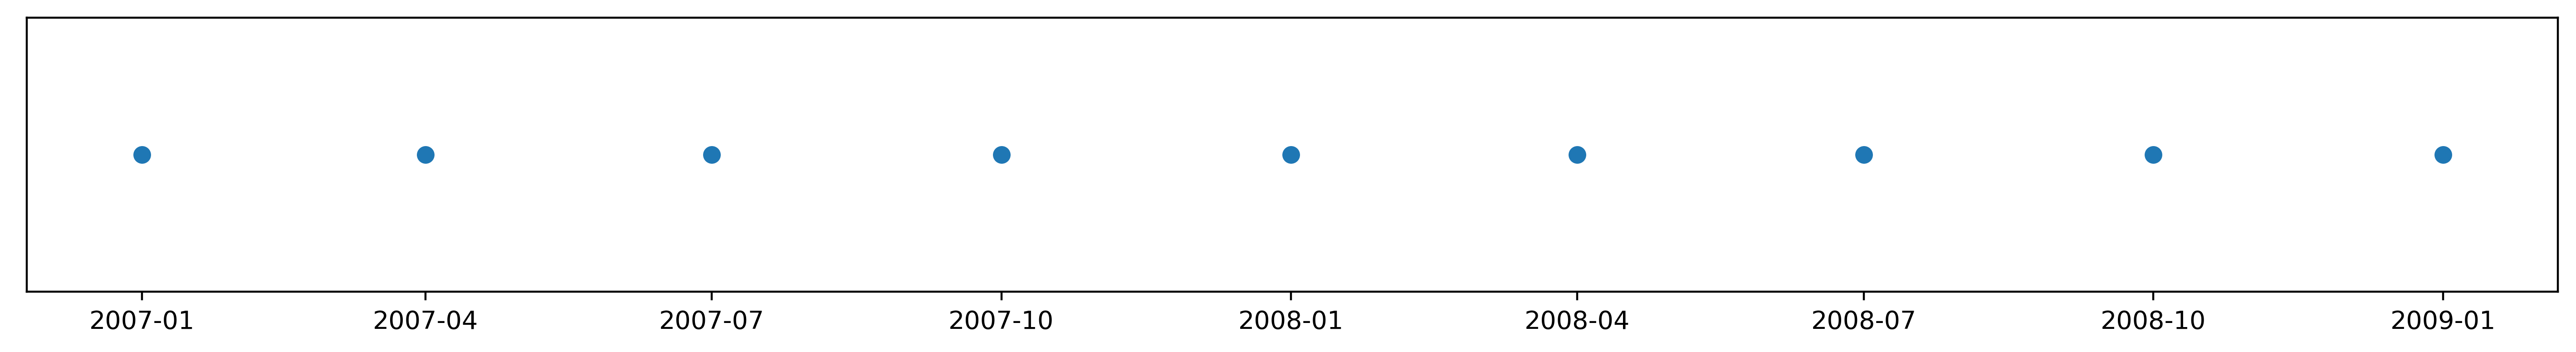

In [33]:
# lets start by making a timeline like before
fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots

# (1) first, repeat our plot like before
ax.plot(date, [1]*len(date), marker='o', lw=0)

# Let's also make a nicer timeline type plot by turning off things

# (2) take off y-ticks
ax.yaxis.set_visible(False)

In fact, let's take off all of the axis outlines except for the bottom:

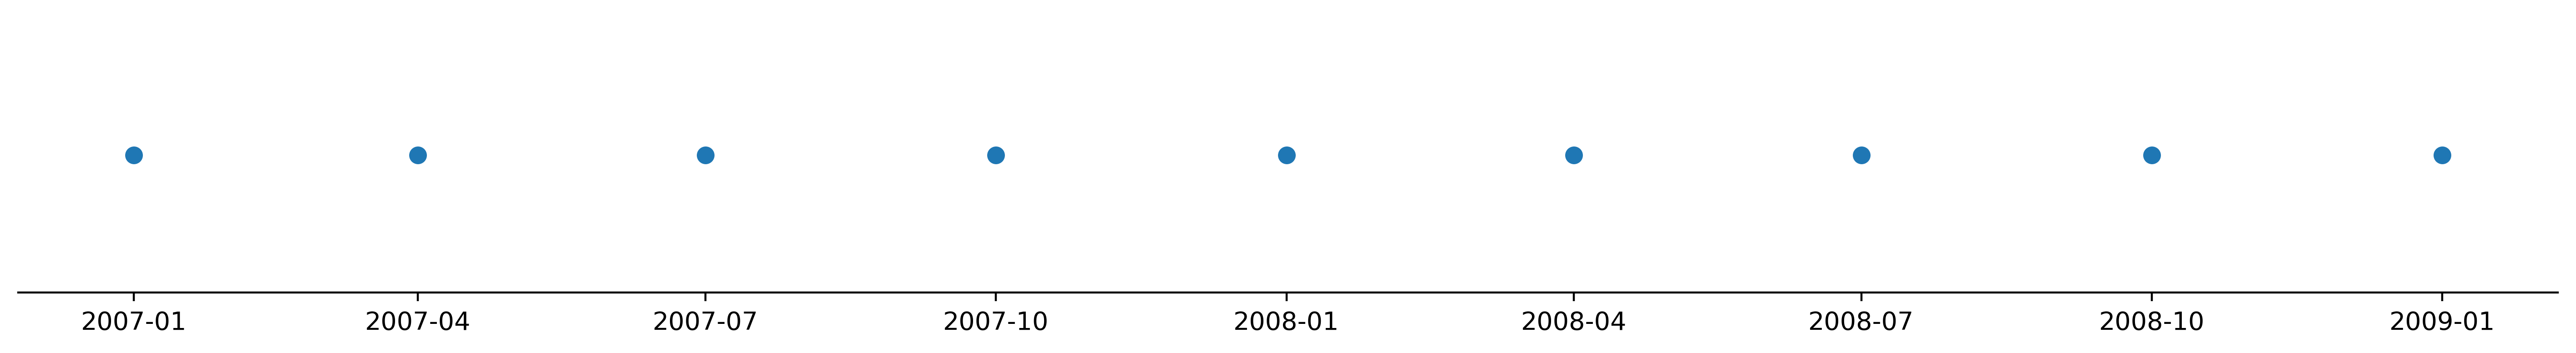

In [34]:
# lets start by making a timeline like before
fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots

# (1) first, repeat our plot like before
ax.plot(date, [1]*len(date), marker='o', lw=0)

# Let's also make a nicer timeline type plot by turning off things

# (2) take off y-ticks
ax.yaxis.set_visible(False)

# (3) take off axis
ax.spines['right'].set_visible(False) # takes off right y-axis
ax.spines['left'].set_visible(False) # takes off left y-axis
ax.spines['top'].set_visible(False) # takes off the top x-axis

Let's make the tick labels of our dates a bit more readable:

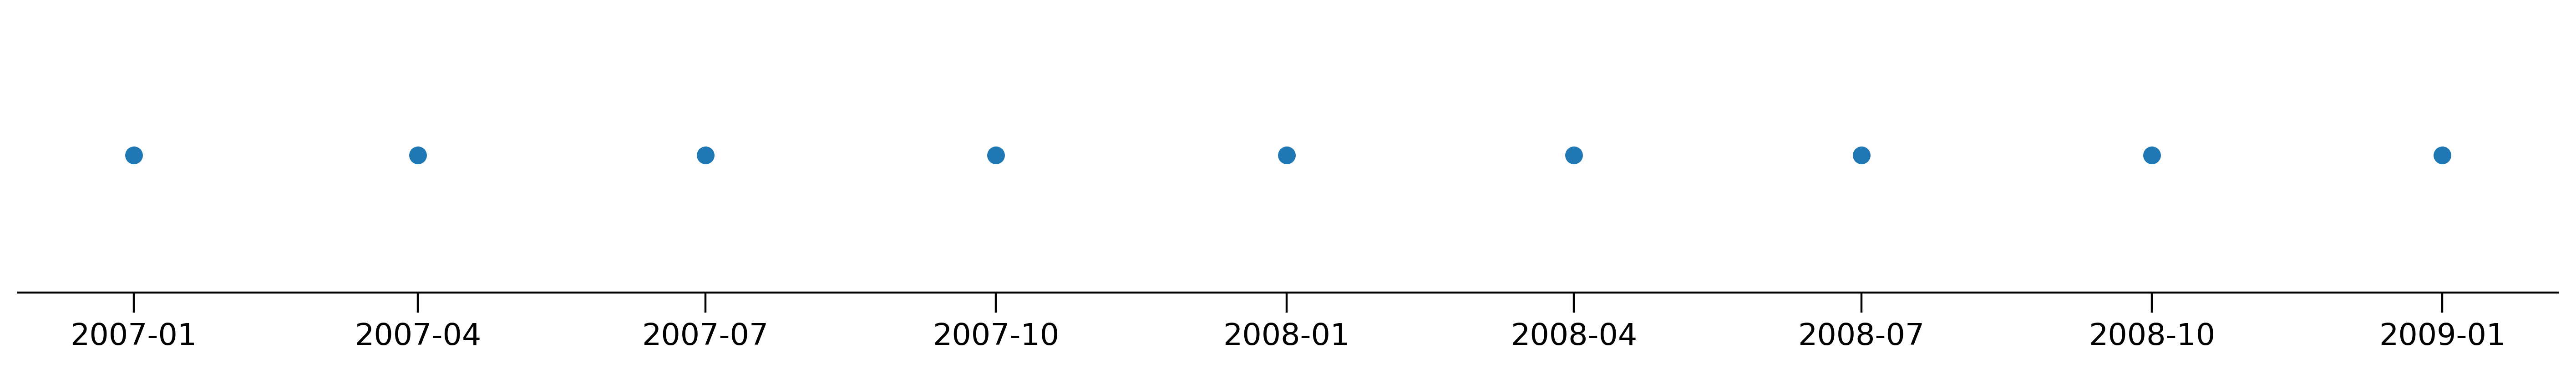

In [35]:
# lets start by making a timeline like before
fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots

# (1) first, repeat our plot like before
ax.plot(date, [1]*len(date), marker='o', lw=0)

# Let's also make a nicer timeline type plot by turning off things

# (2) take off y-ticks
ax.yaxis.set_visible(False)

# (3) take off axis
ax.spines['right'].set_visible(False) # takes off right y-axis
ax.spines['left'].set_visible(False) # takes off left y-axis
ax.spines['top'].set_visible(False) # takes off the top x-axis

# (4) lets make the tick marks more readable
ax.xaxis.set_ticks_position('bottom') # makes sure axis are on the bottom (default), but just incase
ax.xaxis.set_tick_params(labelsize='large', size=8) # lets make the labels large
#ax.xaxis.set_tick_params(which='minor', size=5) # don't think we need this one

Let's also explicitly specify the y-range, even though we can't see the axis -- this will help us customize things later on.

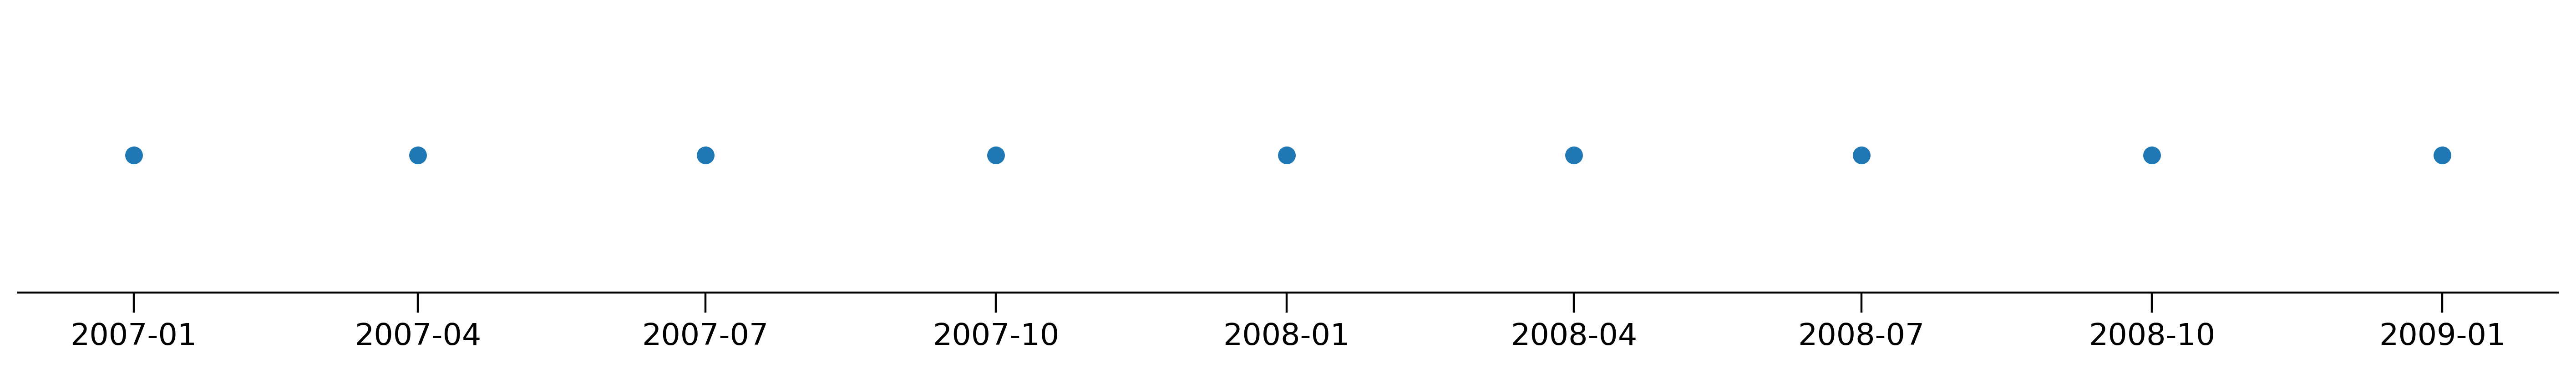

In [36]:
# lets start by making a timeline like before
fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots

# (1) first, repeat our plot like before
ax.plot(date, [1]*len(date), marker='o', lw=0)

# Let's also make a nicer timeline type plot by turning off things

# (2) take off y-ticks
ax.yaxis.set_visible(False)

# (3) take off axis
ax.spines['right'].set_visible(False) # takes off right y-axis
ax.spines['left'].set_visible(False) # takes off left y-axis
ax.spines['top'].set_visible(False) # takes off the top x-axis

# (4) lets make the tick marks more readable
ax.xaxis.set_ticks_position('bottom') # makes sure axis are on the bottom (default), but just incase
ax.xaxis.set_tick_params(labelsize='large', size=8) # lets make the labels large
#ax.xaxis.set_tick_params(which='minor', size=5) # don't think we need this one

# (5) lets zoom in on our points
ax.set_ylim(0.9, 1.1)

plt.show() # NOTE: this stops stuff from being printed out before the plot -- you can try toggling it on/off

Now that we have our basic fancy timeline all plotted, let's add in regions of Low/High GDP that we defined above:

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


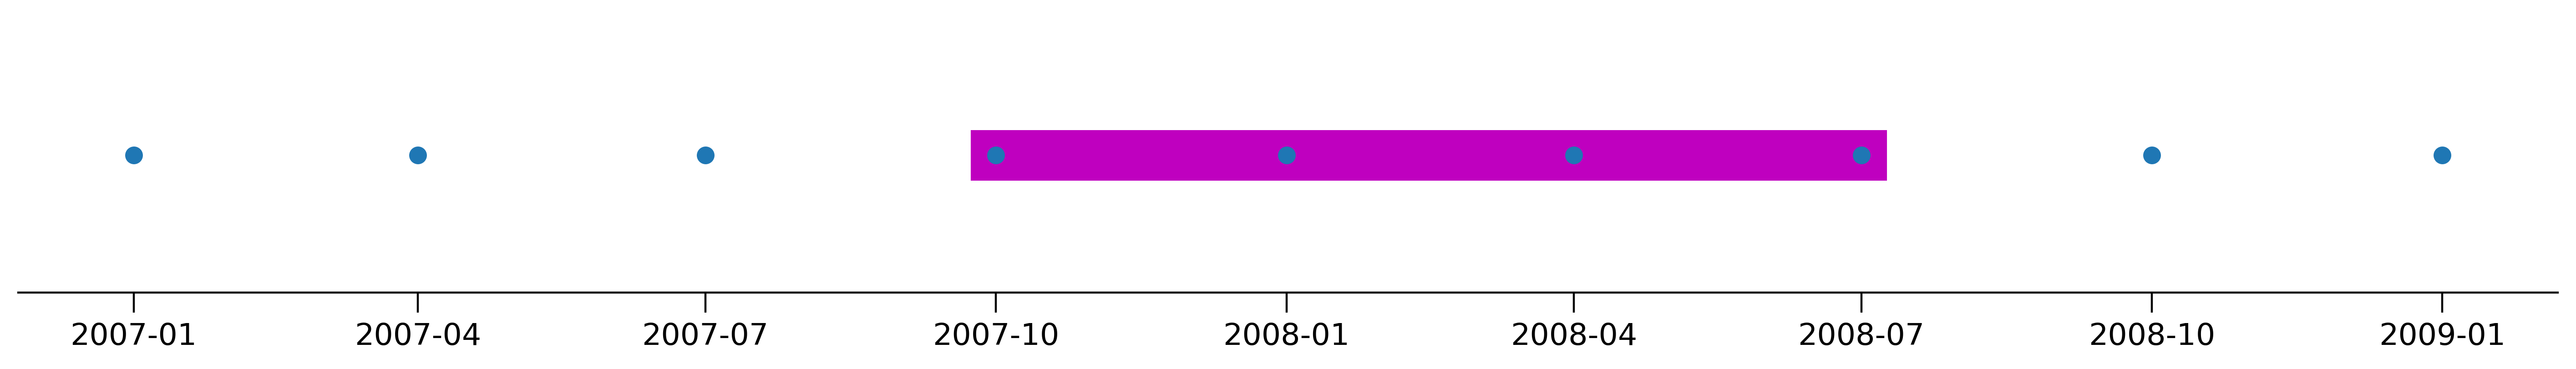

In [37]:
# lets start by making a timeline like before
fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots

# (1) first, repeat our plot like before
ax.plot(date, [1]*len(date), marker='o', lw=0)

# Let's also make a nicer timeline type plot by turning off things

# (2) take off y-ticks
ax.yaxis.set_visible(False)

# (3) take off axis
ax.spines['right'].set_visible(False) # takes off right y-axis
ax.spines['left'].set_visible(False) # takes off left y-axis
ax.spines['top'].set_visible(False) # takes off the top x-axis

# (4) lets make the tick marks more readable
ax.xaxis.set_ticks_position('bottom') # makes sure axis are on the bottom (default), but just incase
ax.xaxis.set_tick_params(labelsize='large', size=8) # lets make the labels large
#ax.xaxis.set_tick_params(which='minor', size=5) # don't think we need this one

# (5) lets zoom in on our points
ax.set_ylim(0.9, 1.1)

# (6) ok, now, lets plot regions of low and high GDP
# to make this easier, lets do it in a for loop
time_lh = [time_low,time_high]
# this will plot a magenta line
# the zorder just means, plot behind our points
for t in time_lh:
    print(t)
    ax.plot(t, [1]*len(t), c='m', marker='', ls='-', lw=20, solid_joinstyle="bevel",
        solid_capstyle="projecting",zorder=0)

# label x 
###ax.set_xlabel('Date')  # maybe lets not

plt.show() 

## So there, are a few things to notice about the above plot.
* first off, there is no point for the low GDP values because this is a single point -- i.e. there is only 1 date tagged as "low" GDP (2007-01-01)
* Also, it really looks like the high region is extending outside the time stamps of 2007-07-01 & 2007-08-01, why?

### Lets play around with our plotting routine to find out!

First, we are going to put everything we did above into a function so we don't have to mess with things one at a time again.  We will specify the "capstyle" of our plot as a parameter for reasons that will be come clearer shortly.

In [38]:
# ***copy-paste above cell***

def make_plot(capstyle):
    
    # set up fig
    fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots
    ax.plot(date, [1]*len(date), marker='o', lw=0)

    # axis
    ax.yaxis.set_visible(False)
    ax.spines['right'].set_visible(False) # takes off right y-axis
    ax.spines['left'].set_visible(False) # takes off left y-axis
    ax.spines['top'].set_visible(False) # takes off the top x-axis

    # tick marks more readable
    ax.xaxis.set_ticks_position('bottom') # makes sure axis are on the bottom (default), but just incase
    ax.xaxis.set_tick_params(labelsize='large', size=8) # lets make the labels large

    # zoom in on our points
    ax.set_ylim(0.9, 1.1)

    # regions of low and high GDP
    time_lh = [time_low,time_high]
    # this will plot a magenta line
    # the zorder just means, plot behind our points
    for t in time_lh:
        print(t)
        ax.plot(t, [1]*len(t), c='m', marker='', ls='-', lw=20, solid_joinstyle="bevel",
            solid_capstyle=capstyle,zorder=0) # note: we changed capstyle here to be read in!

    plt.show()

Let's remake our old plot using this function that we wrote:

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


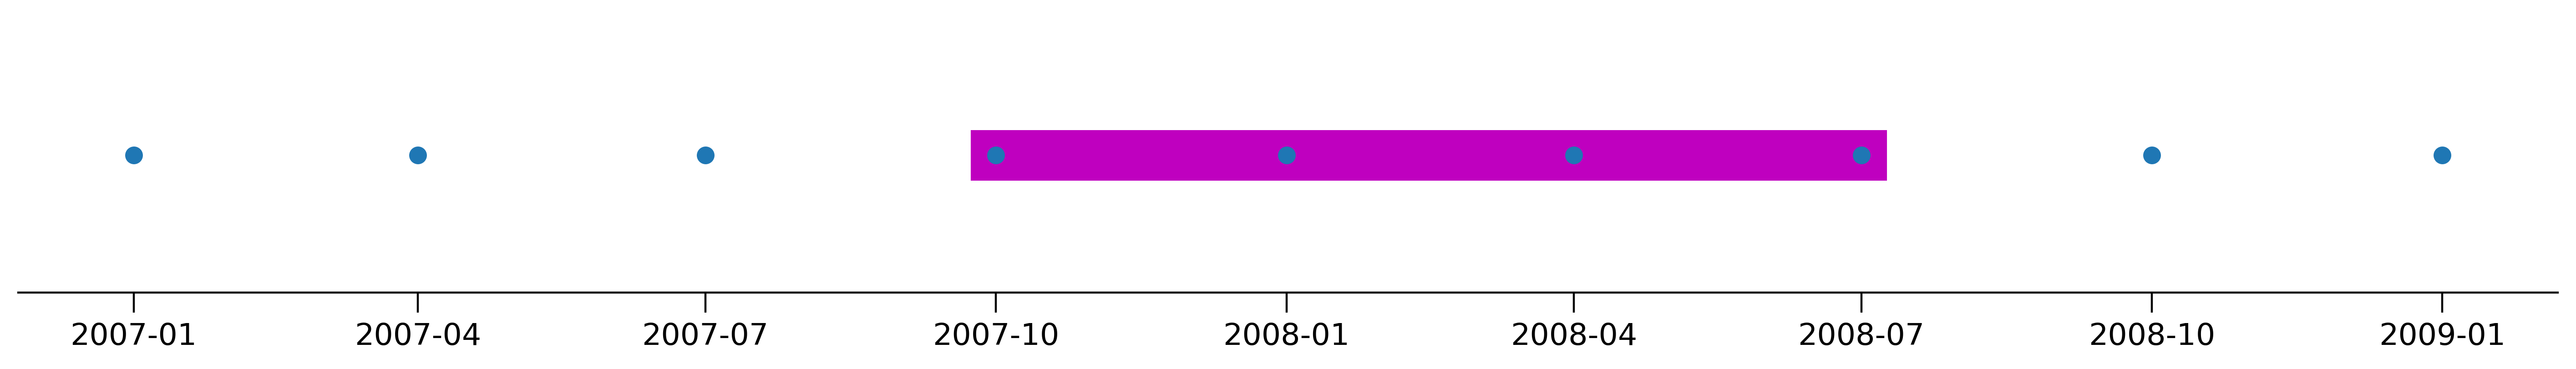

In [39]:
# now, lets make our old plot
make_plot('projecting')

But looking at this, I'm realizing I also don't like this blue over magenta, so lets add in a few other options:

In [40]:
## **NOTE!! don't need to re-do the function, just edit the one above w/a copy-paste!

def make_plot(capstyle, linecolor='m'):
    
    # set up fig
    fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots
    ax.plot(date, [1]*len(date), marker='o', lw=0)

    # axis
    ax.yaxis.set_visible(False)
    ax.spines['right'].set_visible(False) # takes off right y-axis
    ax.spines['left'].set_visible(False) # takes off left y-axis
    ax.spines['top'].set_visible(False) # takes off the top x-axis

    # tick marks more readable
    ax.xaxis.set_ticks_position('bottom') # makes sure axis are on the bottom (default), but just incase
    ax.xaxis.set_tick_params(labelsize='large', size=8) # lets make the labels large

    # zoom in on our points
    ax.set_ylim(0.9, 1.1)

    # regions of low and high GDP
    time_lh = [time_low,time_high]
    # this will plot a magenta line
    # the zorder just means, plot behind our points
    for t in time_lh:
        print(t)
        ax.plot(t, [1]*len(t), c=linecolor, marker='', ls='-', lw=20, solid_joinstyle="bevel",
            solid_capstyle=capstyle,zorder=0) # note: we changed capstyle here to be read in!


    plt.show()

Let's try a few trials of colors:

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


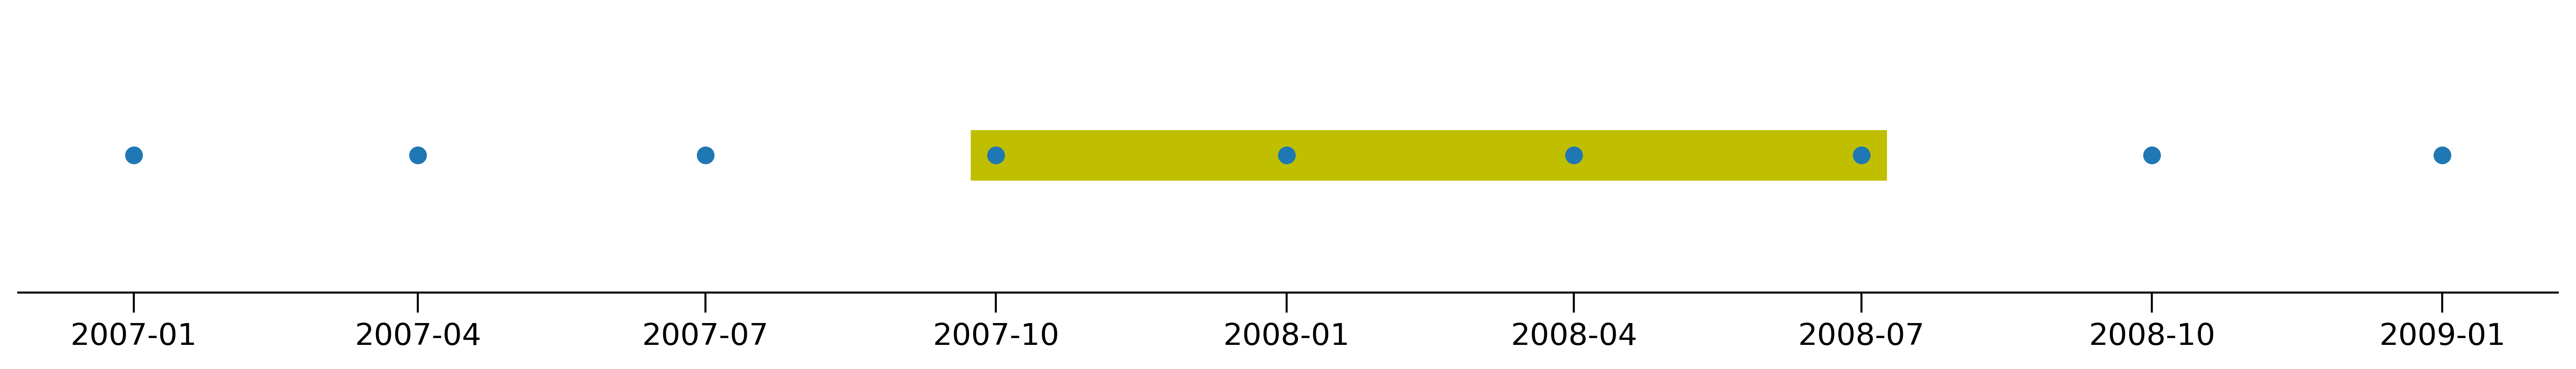

In [41]:
make_plot('projecting', linecolor='y')

Recall: the `linecolor='y'` line is an example of an "optional" parameter, while the `capstyle` is a required parameter to run our function.

Now, lets look at other types of cap styles for our line:

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


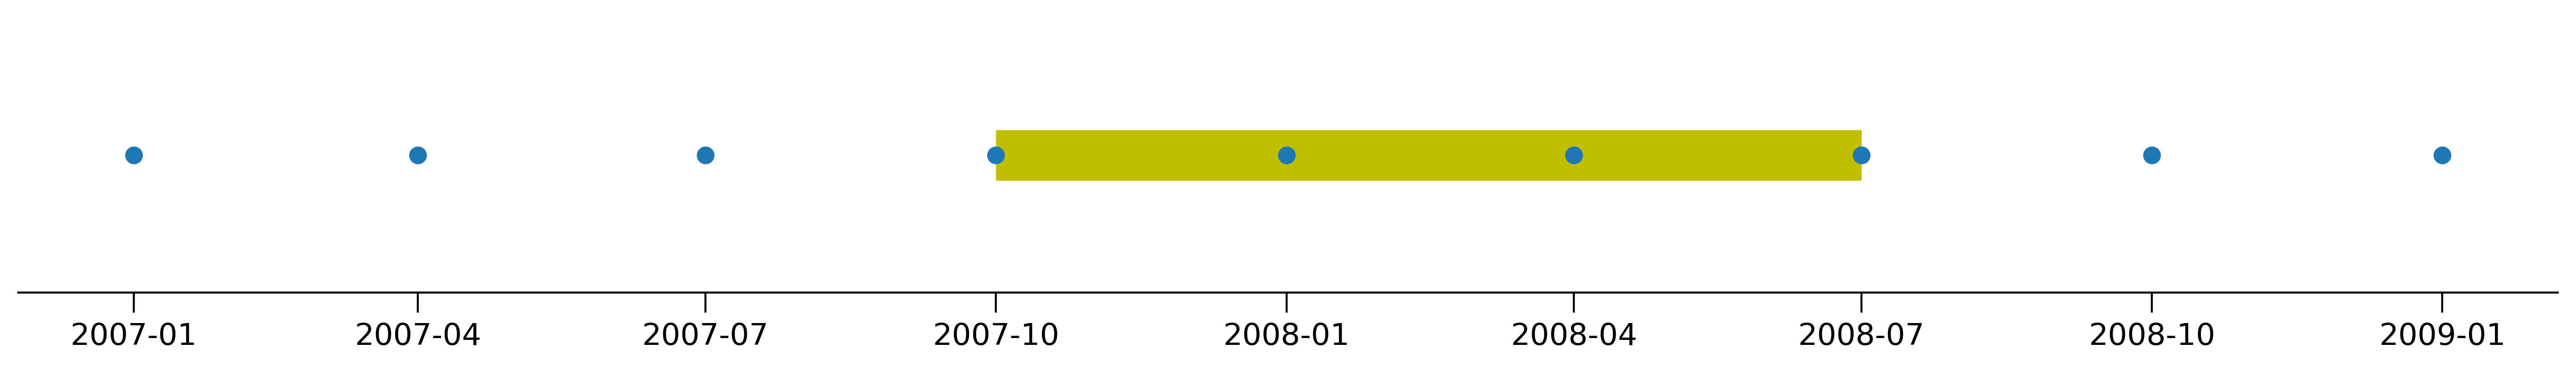

In [42]:
make_plot("butt", linecolor='y')

## Note that now the caps terminate at the measurements

Let's try one more:

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


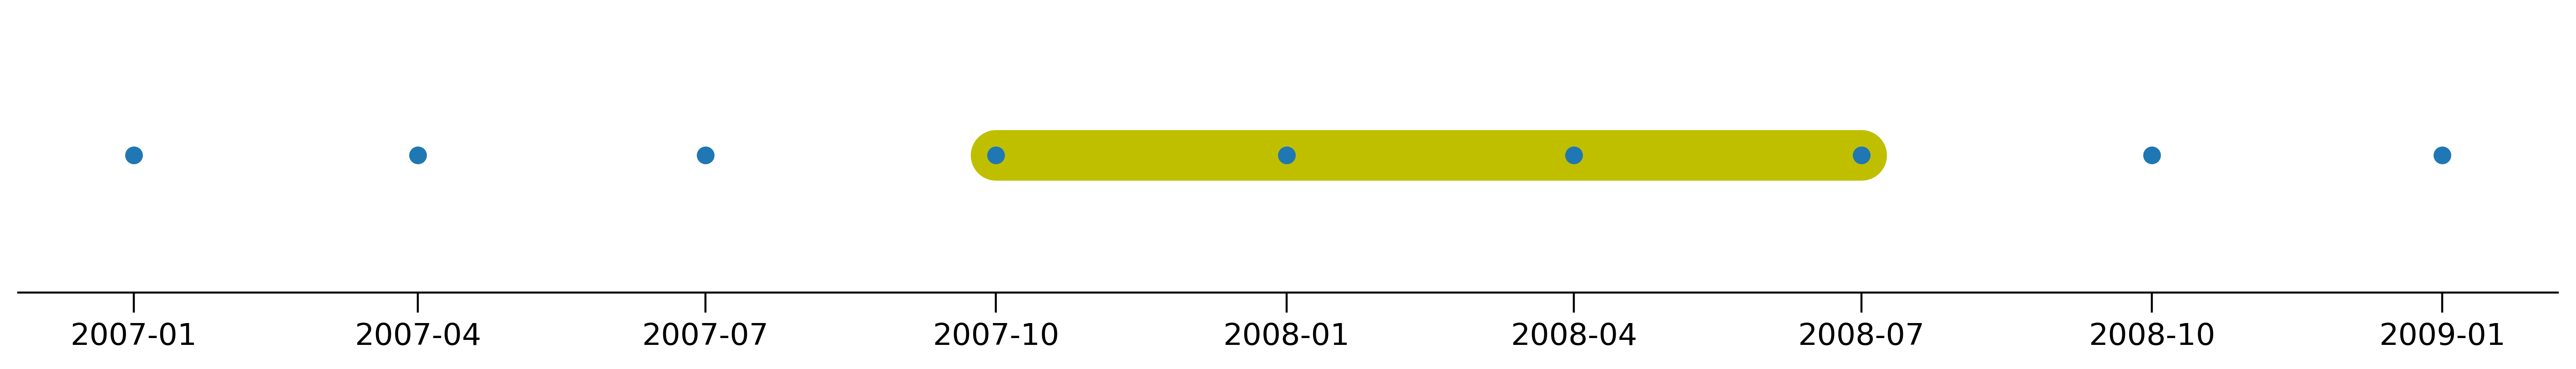

In [43]:
make_plot("round", linecolor='y')

## Take away
We can see with the above example a few things:

 1. that we can express the same data in a few different ways, in this case with a graph of GDP vs. time and also a timeline
 1. We also notice that even small things like how we terminate lines in plots can have a significant effect on the information a viewer takes away from a plot $\rightarrow$ whether or not the GDP is high (or low, though we never even saw the low point!) outside of our actual measurement points or not
 
This was admittedly a bit of a silly example, *but* it highlights the necessity of being careful with our representations of data so we don't accidentally mislead our viewer.  It also highlighted something we'll do often in this class -- build up a plotting routine and then save it as a function to play with different plotting parameters.

# ------- WE WILL PROBABLY SKIP DIAGRAMS -------

## We can also use python to make diagrams
* This uses matplotlib.patches

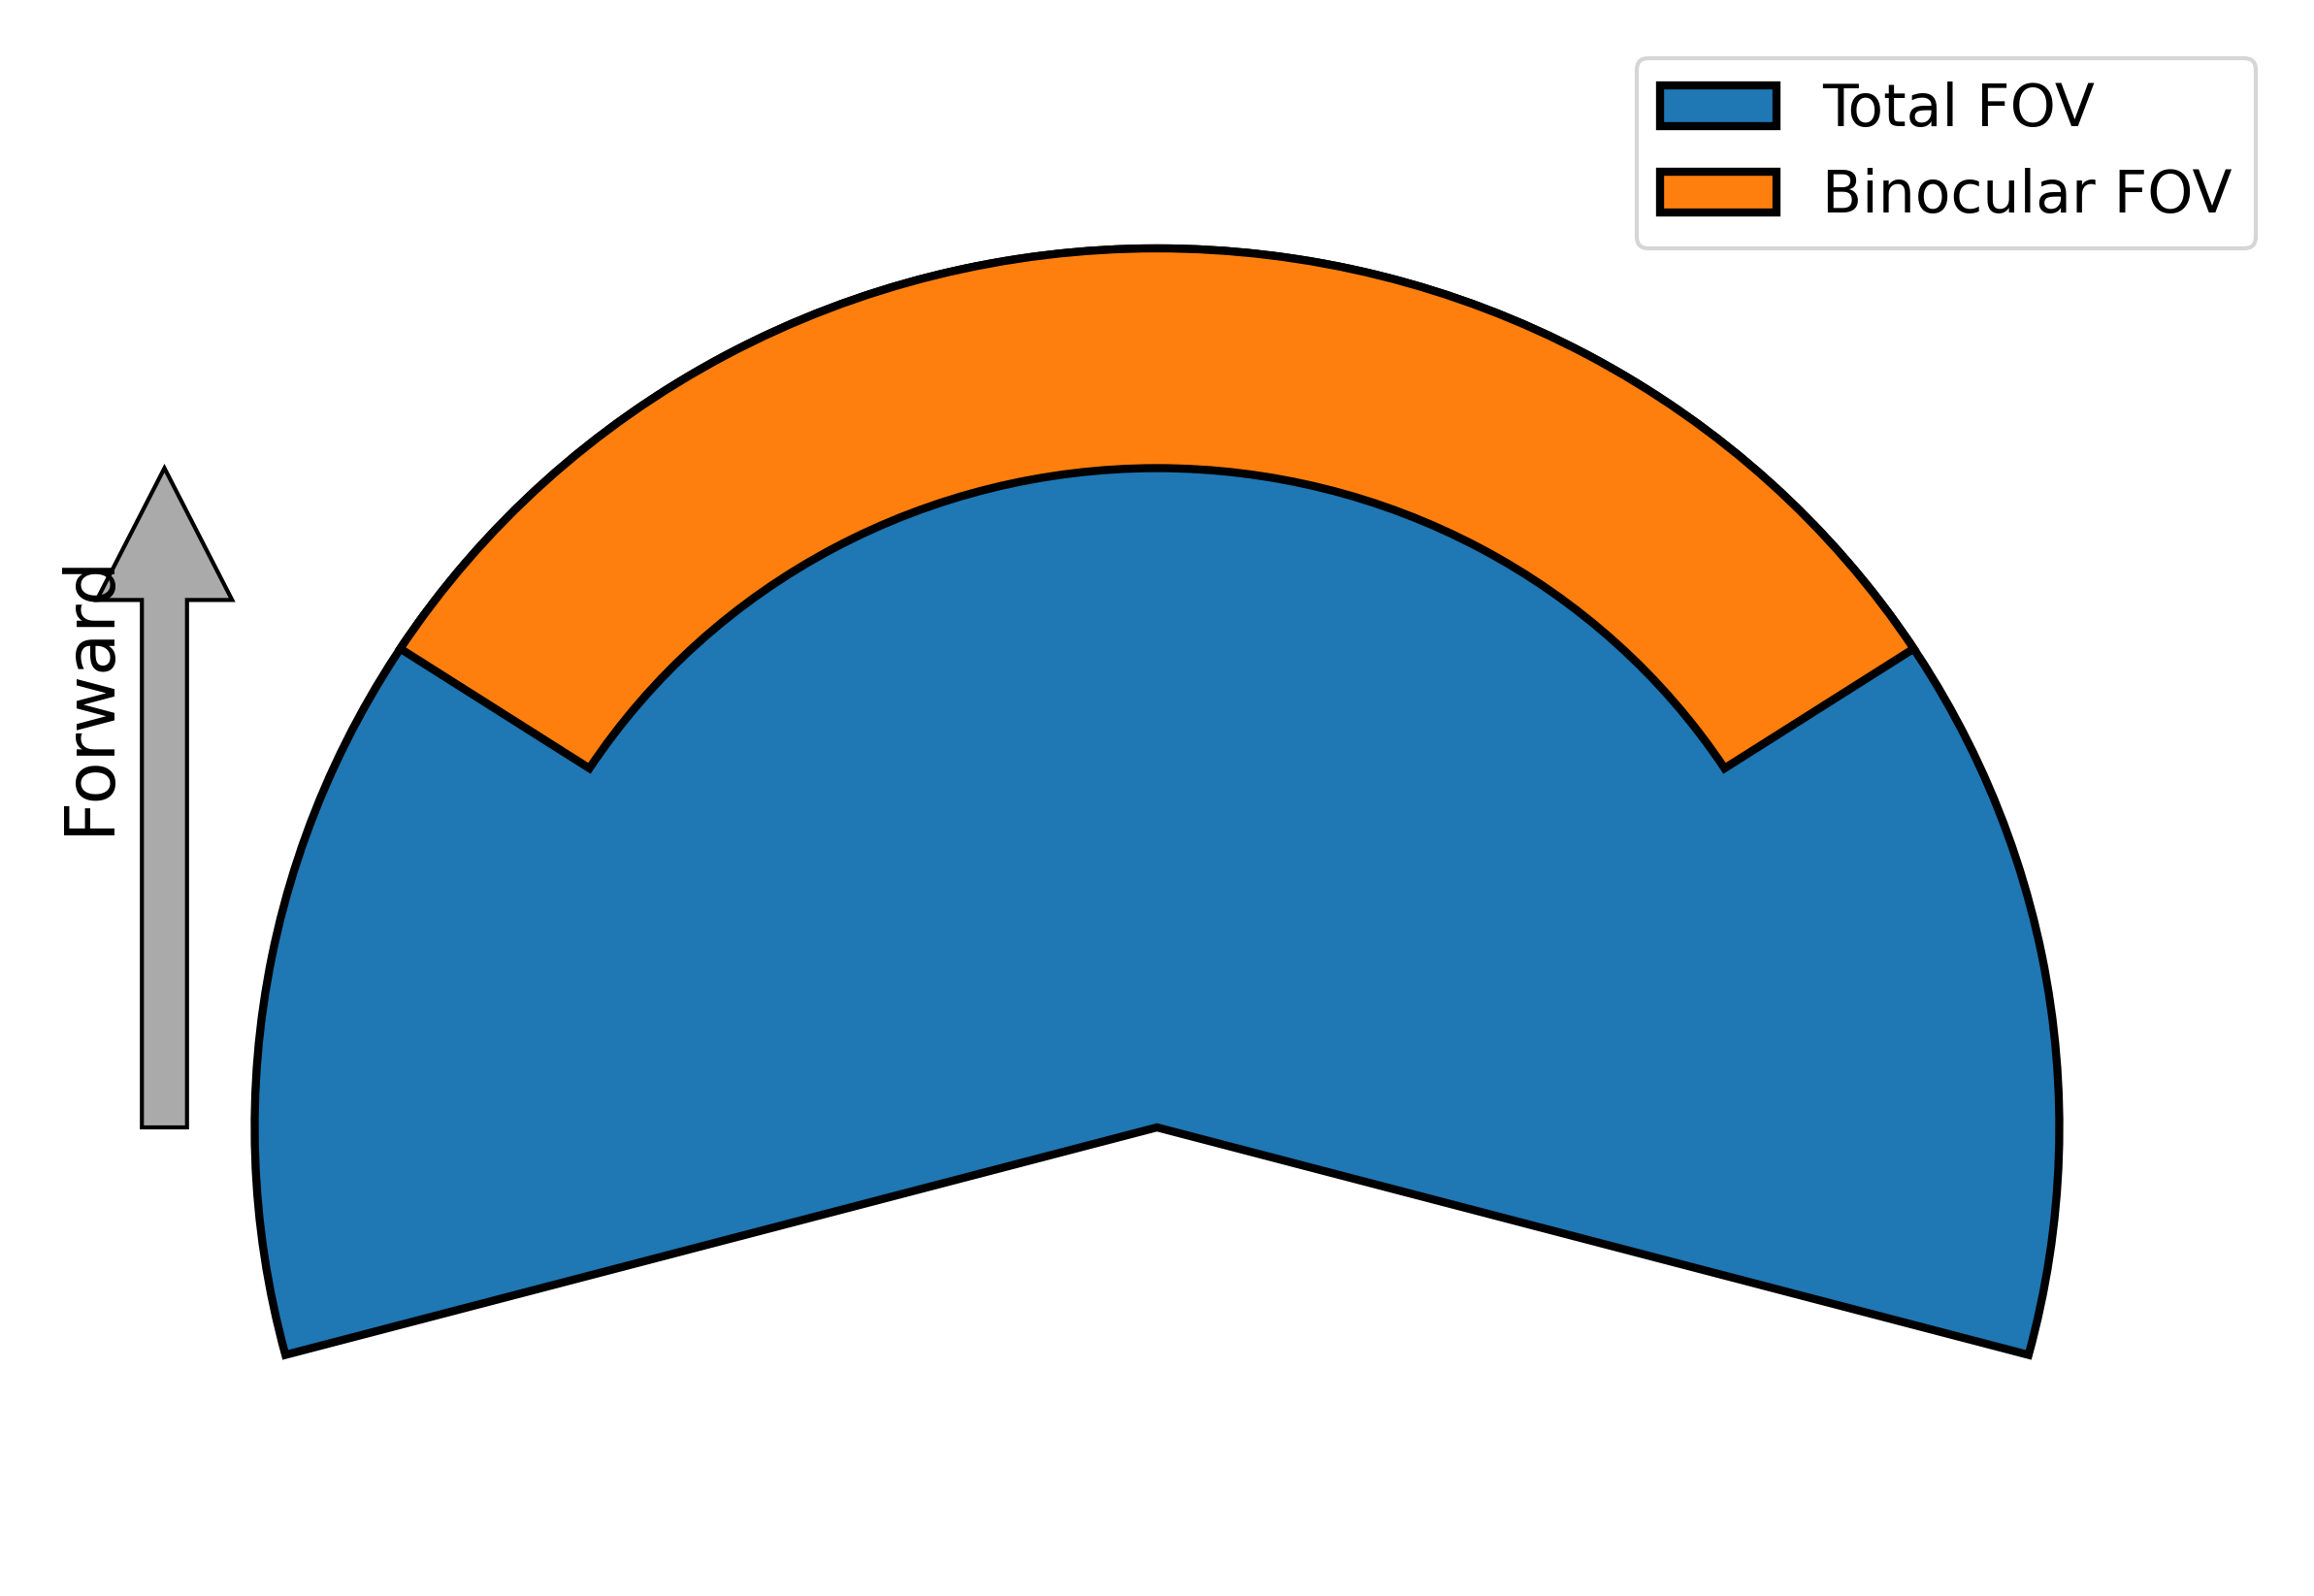

In [44]:
# lets re-do that diagram of the angular distribution of human vision we had in the slides

# make edge color for our patches black
edgecolor = "#000000"
# note, the above uses the standard hex codes for colors
#  we'll talk a bit about this later, but you can also just google "hex color codes", like so:
# https://www.color-hex.com/

# lets color our patches like what is in the slide
facecolor_totalFOV = "#1f77b4" # blueish
facecolor_bincFOV = "#ff7f0e" # orangish

# NOTE: do plt.show after each step!!

# (1)
totalFOV = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 90 - (210/2.0), 90 + (210/2.0), # span of the wedge
                                    lw=2.0, 
                                    facecolor=facecolor_totalFOV, 
                                    edgecolor=edgecolor)

# (3) lets put this other wedge definition up here with the totalFOV one for consistency
binoc = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 90 - (114/2.0), 90 + (114/2.0), 
                                 width=0.25, # so that it doesn't overlap totally with total FOV
                                 lw=2.0, 
                                 facecolor=facecolor_bincFOV, edgecolor=edgecolor)

# (5) Finally, if we remember back to the figure, there was an arrow dictating 
#     the forward direction
facecolor_arrow = "#aaaaaa"
arrow = matplotlib.patches.Arrow(-1.10, 0.0, 0.0, 0.75, 
                                 width=0.25, edgecolor=edgecolor, 
                                 facecolor=facecolor_arrow)#, label="forward")


# (1)
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)
ax.add_patch(totalFOV)
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-0.5, 1.25)

# (3)
ax.add_patch(binoc)

# (5)
ax.add_patch(arrow)

# (6) Finally, lets overplot the arrow's notatoin
plt.text(-1.22, 0.35, "Forward", rotation=90, fontsize="xx-large")


# (4) lets also add a legend to remind us what is what
ax.legend([totalFOV, binoc], ["Total FOV", "Binocular FOV"], fontsize="x-large")


# (2) lets disappear the axis & ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## Take away
* so, that was a lot of effort (maybe) to make a diagram, *but* we can now go back and change things very easily 
* for example we can change all the colors **do this**, or we can change the size of the wedge
* the take away is that Python not only makes graphs, but it can also be used to make diagrams

# ------- END OF DIAGRAMS -------

# Quick intro to image manipulation with Python
* lets try with our stitch image

## ------ NOTE: BELOW DOESN'T NEED TO BE RUN TO FIX IMAGE COLORS ------

I had to run this to "fix" the colors of this image, but you shouldn't have to do this bit of code -- you can download the "fixed" image which takes a multi-color thing and turns it into 3 colors (white inside, black outline, and red inside).

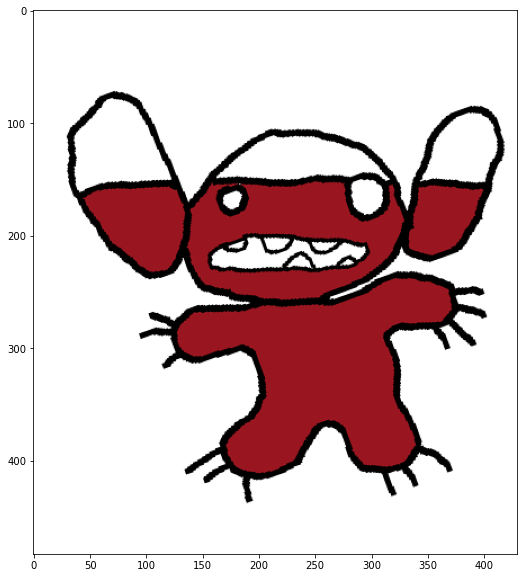

In [47]:
# note: for this to work you might have to install pillow
#  either with pip: pip3 install pillow (might have to use sudo)
#  or anaconda: conda install -c anaconda pillow 
# Also, I think there is a way to do it using the GUI, but I've never used the Anaconda GUI to install things before
import PIL.Image as Image
#data = np.array(Image.open("https://uiuc-ischool-dataviz.github.io/spring2019online/week01/images/stitch_nobg_tilted.png", "r"))
im = Image.open("/Users/jillnaiman/is445_spring2022/week02/images/stitch_nobg_tilted.png", "r")

# lets check out our figure
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(im)


In [48]:
# now, lets turn this image into a numpy array
data = np.array(im)

# lets see how many colors we have
np.unique(data[:,:,0]) # check out just 1 color

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

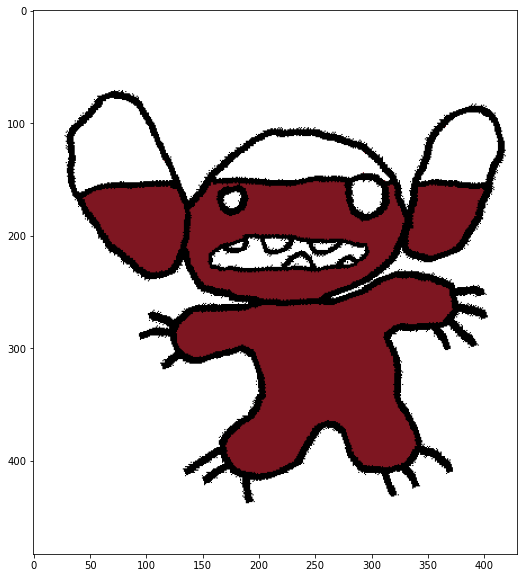

In [69]:
# so why is there a full range in a 3 color image?  
#  this is just because the pixelation has done some interpolating
# so lets fix it!

# black is given by 0,0,0
# white is 255, 255, 255

# lets go through and make all "grays" into whites
# steps are check for same values
# make sure those values aren't black
# if not, set to white
# else, if not black, set to red
for i in range(data.shape[0]):
    for j in range(data.shape[1]): # note, this is inefficient
        if (data[i,j,0] == data[i,j,1]) and (data[i,j,1] == data[i,j,2]) \
        and (data[i,j,0] > 10) and (data[i,j,1] > 10) and (data[i,j,2] > 10) and\
        data[i,j,3] != 0: # last part is a check for transparency, only want non-transparent things
            data[i,j,:] = (255,255,255,255)
        elif (data[i,j,0] < 10 and data[i,j,1]<10 and data[i,j,2]<10) and data[i,j,3] != 0: # near-blacks
            data[i,j,:] = (0,0,0,255)
        elif (data[i,j,0] != 0) and (data[i,j,1] != 0) and (data[i,j,2] != 0): # not black, not white
            data[i,j,:] = (126, 22, 33, 255) # set to opaque red!
        elif (data[i,j,3] == 0): # transparent, set to black
            data[i,j,:] = (0,0,0,0)

            
# lets check out our figure
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.fromarray(data))

im = Image.fromarray(data)
im.show()

#data            

In [70]:
np.unique(data[:,:,0])

array([  0, 126, 255], dtype=uint8)

In [71]:
# save zee image
#im.save("/Users/jillnaiman1/spring2019online/week01/images/stitch_reworked.png")

## ------- DONE REWORKING IMAGE ------

## Read in reworked Stitch image and do some stats

**Note:** for this to work you might have to install pillow either with pip: `pip3 install pillow` (might have to use sudo, but hopefully not) or anaconda: `conda install -c anaconda pillow`. Also, I think there is a way to do it using the GUI, but I've never used the Anaconda GUI to install things before so you are on your own!

In [49]:
import PIL.Image as Image
im = Image.open("/Users/jillnaiman/Downloads/stitch_reworked.png", "r")

data = np.array(im)

Let's look at both:

In [50]:
np.unique(data[:,:,0])
# so we see there are only 3 colors

array([  0, 126, 255], dtype=uint8)

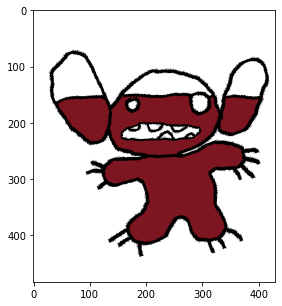

In [51]:
# Let's remind ourselves a bit of what this image looks like
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(im)
plt.show()

We know from our discussion in class that measuring Stitch's levels of goodness or badness from this image are not very accurate.  Let's now use pixel filling to determine the volumetric good and bad levels more accurately!

In [52]:
ngood = (data[:,:,0] == 255).sum() # number of "good" pixels, white inside
nbad = (data[:,:,0] == 126).sum() # number of "bad" pixels

total = ngood + nbad # total pixels

badness = nbad / total # badness as % of total
goodness = ngood/  total # goodness as % of total
print(badness, goodness)

0.774405234691176 0.22559476530882408


So, it looks like ~77% bad and 23% good.  Does that match up with what you'd think from looking at the above figure?

Let's try a few other methods of visualizing this very silly dataset:

(0.0, 2.0)

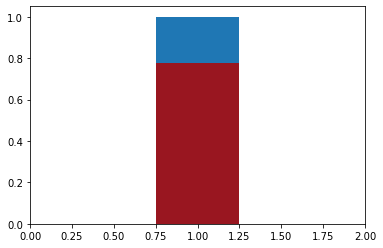

In [53]:
# now, lets plot this thing on a little bar graph!
p1 = plt.bar([1], badness, [0.5], color='#991620') # note how color is specified here -> more on this in a few weeks!
p2 = plt.bar([1], goodness, [0.5], bottom=badness)
plt.xlim(0.0, 2.0)

What if we just counted pixes from our figure above? Looks like good changes to badness at ~150, image top is at ~75 pixels image bottom is at ~425 pixels:

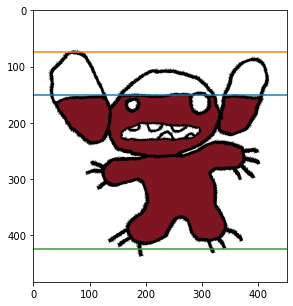

In [54]:
# Let's remind ourselves a bit of what this image looks like
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(im)

ax.plot([0,450], [150, 150]) # approximate badness line
ax.plot([0,450], [75, 75]) # approximate top line
ax.plot([0,450], [425, 425]) # approximate bottom line

ax.set_xlim(0,450)

plt.show()

So trying to do this calculation by eye/hand:

In [55]:
# so:
goodness_apparent = (75-150)/(75-425)

# 372 pixels for full height, 72 for goodness
#goodness_apparent = 79./362.

In [56]:
print(goodness_apparent)

0.21428571428571427


In [57]:
# what is badness, apparent
1.0-goodness_apparent

0.7857142857142857

([<matplotlib.patches.Wedge at 0x7feb18705810>,
 [Text(-0.8351102665775723, 0.7159544976161101, ''),
  Text(0.8351102665775721, -0.7159544976161102, '')])

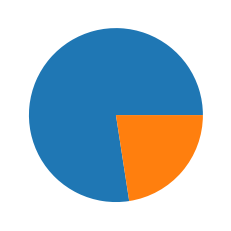

In [58]:
plt.pie([badness,goodness]) # can also do a pie chart if we want I suppose :D